# Task 4: Unsupervised Learning

## Exercise 1: Clustering

In [50]:
import numpy as np
import pandas as pd

# Load the microchips (it is from assignment 1) dataset
microchips_df = pd.read_csv('datasets/microchips.csv')
X_microchips = microchips_df.iloc[:, :2].values

# Implementing the k-means 
def kmeans(X, k, max_iters=100):
    n, p = X.shape
    centroids = X[np.random.choice(n, k, replace=False)]
    for _ in range(max_iters):
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        clusters = np.argmin(distances, axis=1)
        new_centroids = np.array([X[clusters == j].mean(axis=0) for j in range(k)])
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    sse = np.sum((X - centroids[clusters]) ** 2)
    return clusters, centroids, sse

# Implementing the bisecting k-means
def bkmeans(X, k, iter=10):
    n, p = X.shape
    clusters = np.zeros(n, dtype=int)
    # Start with all points in one cluster
    cluster_list = [np.arange(n)]
    while len(cluster_list) < k:
        # Find the largest cluster to bisect
        largest_cluster_indices = max(cluster_list, key=len)
        cluster_list.remove(largest_cluster_indices)
        best_sse = float('inf')
        best_split = None
        for _ in range(iter):
            split_clusters, split_centroids, split_sse = kmeans(X[largest_cluster_indices], 2)
            if split_sse < best_sse:
                best_sse = split_sse
                best_split = split_clusters
        split_clusters = best_split
        # Create new clusters
        new_cluster_index = max(clusters) + 1
        sub_cluster_indices_0 = largest_cluster_indices[split_clusters == 0]
        sub_cluster_indices_1 = largest_cluster_indices[split_clusters == 1]
        clusters[sub_cluster_indices_0] = new_cluster_index
        clusters[sub_cluster_indices_1] = new_cluster_index + 1
        # Add new clusters to the list
        cluster_list.append(sub_cluster_indices_0)
        cluster_list.append(sub_cluster_indices_1)
    # Normalize cluster indices 
    unique_clusters = np.unique(clusters)
    normalized_clusters = np.zeros_like(clusters)
    for new_index, old_index in enumerate(unique_clusters):
        normalized_clusters[clusters == old_index] = new_index
    return normalized_clusters

# Set parameters
k = 3
iter = 10

# Apply bisecting k-means
clusters_microchips = bkmeans(X_microchips, k, iter)
print(clusters_microchips)

# Verify the number of unique clusters
print("Number of unique clusters:", len(np.unique(clusters_microchips)))


[2 2 2 2 2 2 0 0 0 0 0 0 0 1 1 1 1 2 2 2 2 2 0 0 0 0 0 2 2 2 2 2 2 2 2 0 0
 0 0 0 0 0 0 0 0 1 1 1 1 1 2 2 2 2 2 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 2 0 0 2
 2 2 2 2 1 0]
Number of unique clusters: 3


## Exercise 2: Visualization of Results
In this section, instead of downloading a ready-made dataset, I decided to create a dataset with Python and use this dataset that complies with the instructions. Because almost all datasets that adhere to the exercise's instructions of at least 4 features and 1000 lines consisted of approximately 50 features and 100,000 lines. This means that the code's running time will be quite long. Therefore, I found it more appropriate to save time with datasets created with Python. However, the code also works without any problems with the very large datasets I mentioned, it just takes a long time.  
The first dataset:

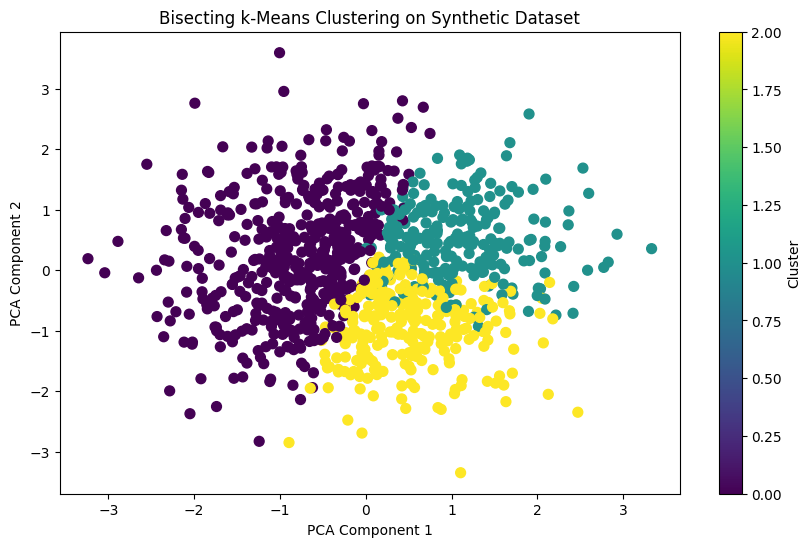

In [51]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the synthetic dataset
dataset = pd.read_csv('datasets/synthetic_dataset.csv')
X = dataset.iloc[:, :-1].values  
y = dataset['label'].values      

# Apply bisecting k-means
clusters = bkmeans(X, k, iter)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=50)
plt.title("Bisecting k-Means Clustering on Synthetic Dataset")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster')
plt.show()


Two more new datasets:

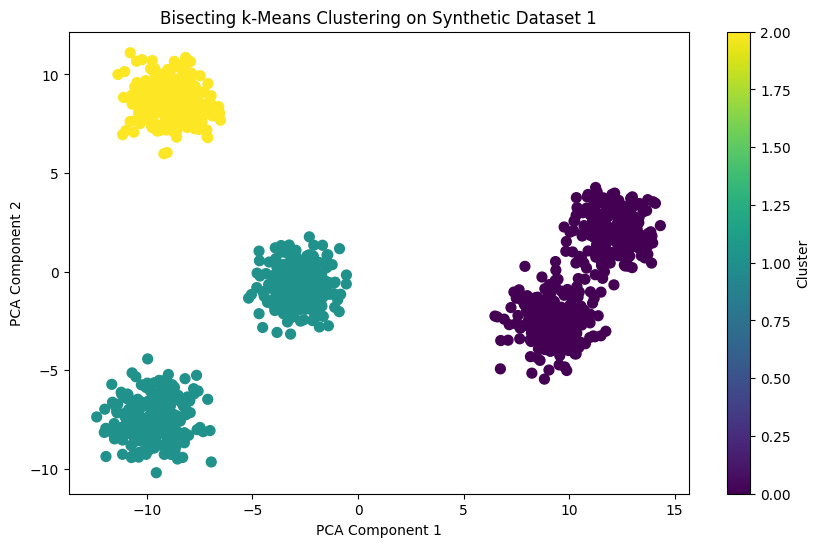

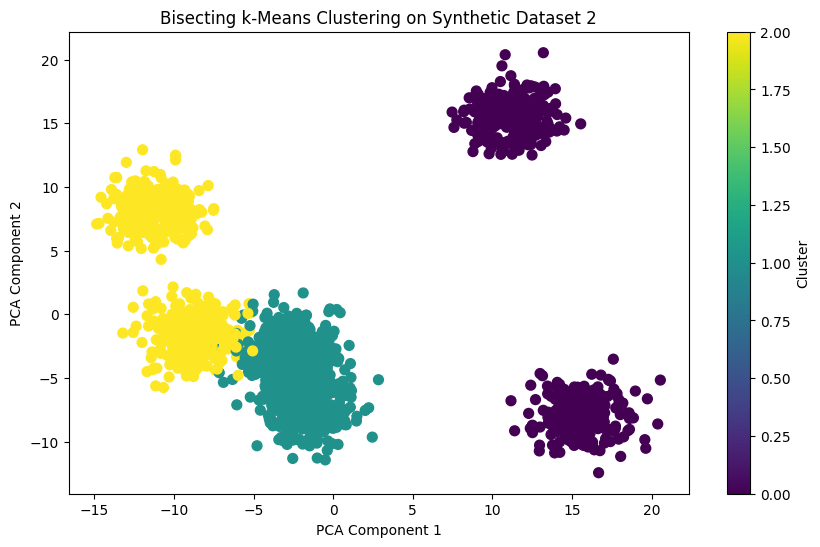

In [58]:
# Load the synthetic dataset 1
dataset_1 = pd.read_csv('datasets/synthetic_dataset_1.csv')
X_1 = dataset_1.iloc[:, :-1].values  # Features
y_1 = dataset_1['label'].values      # Labels

# Load the synthetic dataset 2
dataset_2 = pd.read_csv('datasets/synthetic_dataset_2.csv')
X_2 = dataset_2.iloc[:, :-1].values  # Features
y_2 = dataset_2['label'].values      # Labels

clusters_1 = bkmeans(X_1, k, iter)
pca = PCA(n_components=2)
X_pca_1 = pca.fit_transform(X_1)

# Plot for dataset 1
plt.figure(figsize=(10, 6))
plt.scatter(X_pca_1[:, 0], X_pca_1[:, 1], c=clusters_1, cmap='viridis', s=50)
plt.title("Bisecting k-Means Clustering on Synthetic Dataset 1")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster')
plt.show()

clusters_2 = bkmeans(X_2, k, iter)
X_pca_2 = pca.fit_transform(X_2)

# Plot for dataset 2
plt.figure(figsize=(10, 6))
plt.scatter(X_pca_2[:, 0], X_pca_2[:, 1], c=clusters_2, cmap='viridis', s=50)
plt.title("Bisecting k-Means Clustering on Synthetic Dataset 2")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster')
plt.show()

## 2.1. Comparison of DR Techniques

**In your opinion, which technique performed the best for each dataset, regarding the separation of the classes?**  
For Dataset 1: Both PCA, MDS and relatively TSNE were able to separate the clusters clearly and distinctly and performed very well. In all of them, the clusters were well defined and easily distinguishable, but I think MDS was the best.  
For Dataset 2: TSNE performed by far better than the other techniques. TSNE provided the best separation of clusters. MDS also performed well, but it was not as clear and successful as TSNE. PCA was a complete disappointment here.  
For Dataset 3: Strangely, none of these techniques achieved perfect separation. TSNE showed a relatively better separation than the others, but still failed to provide good separation.  

**How are the classes in the data sets separated?**  
For Dataset 1: Classes are well separated into distinct clusters. Separation is clean, no overlap between clusters, only a small amount of overlap for PCA.  
For Dataset 2: TNSE provides the clearest separation. However, there is a small amount of overlap for MDS. PCA has a very large overlap and fails to separate.  
For Dataset 3: Neither technique is successful. There is significant overlap, especially for PCA and MDS. TNSE does a slightly better job, but there is still overlap there.  

**Are some classes easier to separate than others?**  
Yes, some classes are easier to separate than others. I think it depends on the dimensionality reduction technique used for the datasets. Dataset 1 was the easiest to separate for all techniques. Dataset 2 was also easy to separate, although PCA had some difficulty. However, Dataset 3 was the hardest to separate for all techniques.  

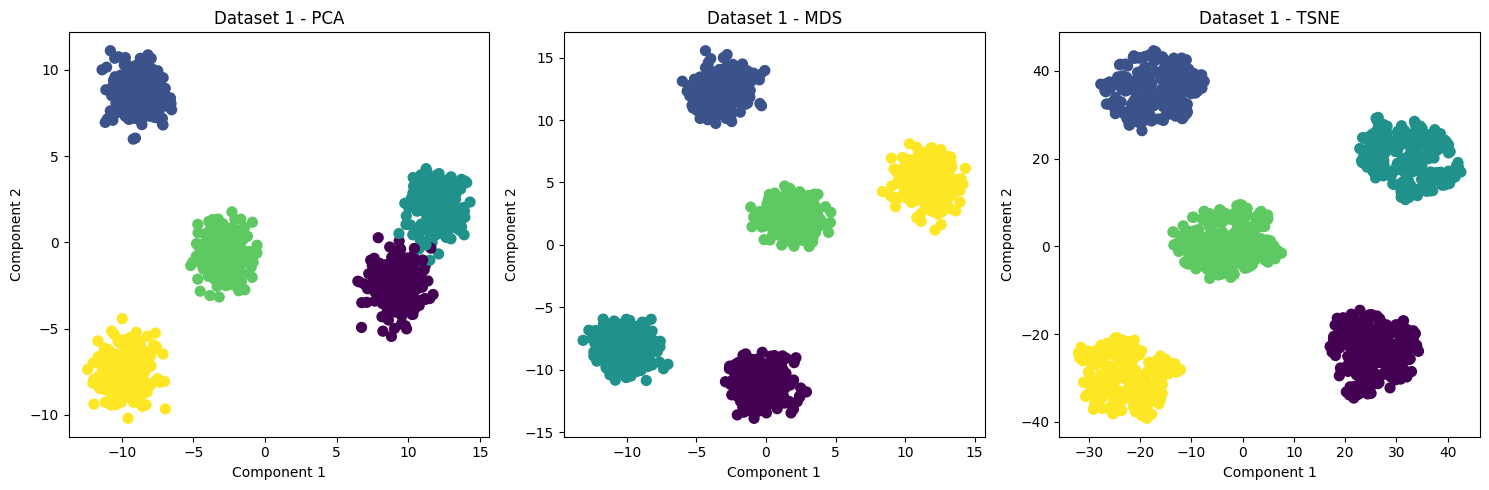

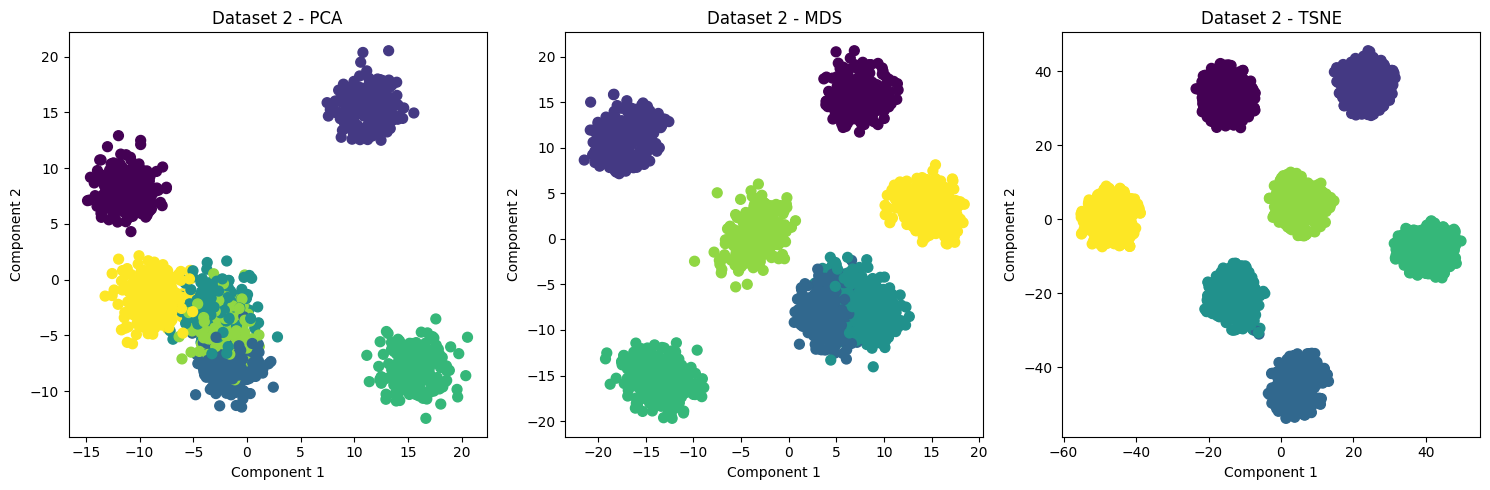

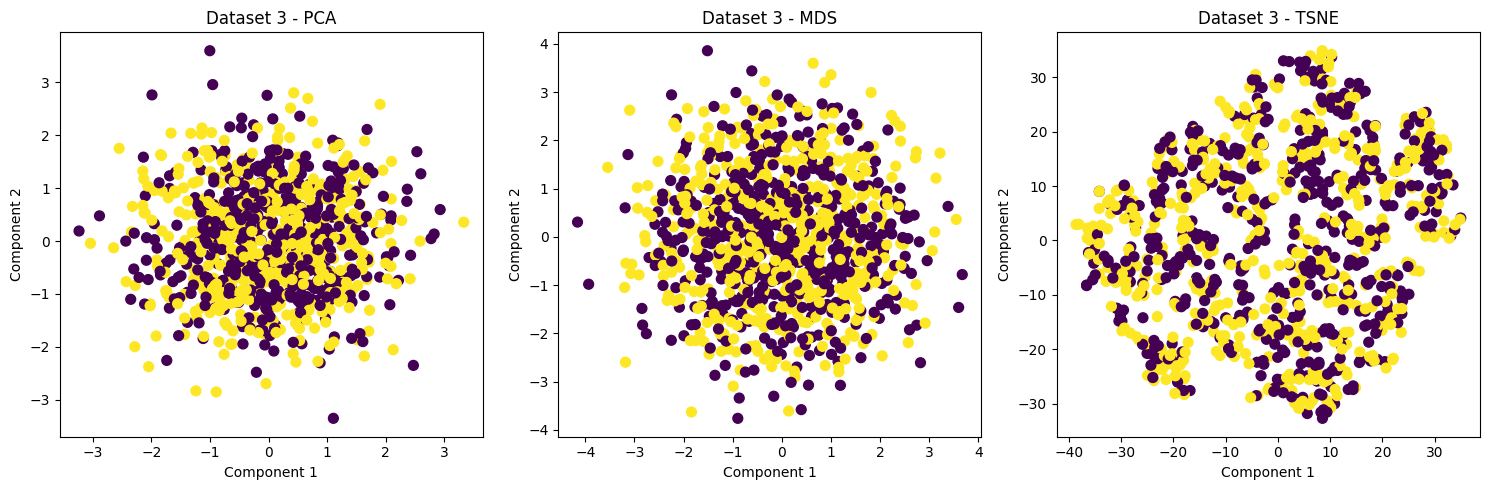

In [39]:
from sklearn.manifold import MDS, TSNE

# Load the synthetic datasets
dataset_1 = pd.read_csv('datasets/synthetic_dataset_1.csv')
dataset_2 = pd.read_csv('datasets/synthetic_dataset_2.csv')
dataset_3 = pd.read_csv('datasets/synthetic_dataset.csv')

# Extract features and labels
X_1 = dataset_1.iloc[:, :-1].values
y_1 = dataset_1['label'].values
X_2 = dataset_2.iloc[:, :-1].values
y_2 = dataset_2['label'].values
X_3 = dataset_3.iloc[:, :-1].values
y_3 = dataset_3['label'].values

# List of DR techniques
dr_techniques = [PCA(n_components=2), MDS(n_components=2), TSNE(n_components=2, random_state=42)]

# Function to apply DR techniques and plot
def plot_dr_techniques(X, y, title_prefix):
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    for ax, dr in zip(axs, dr_techniques):
        X_dr = dr.fit_transform(X)
        ax.scatter(X_dr[:, 0], X_dr[:, 1], c=y, cmap='viridis', s=50)
        ax.set_title(f"{title_prefix} - {dr.__class__.__name__}")
        ax.set_xlabel("Component 1")
        ax.set_ylabel("Component 2")
    plt.tight_layout()
    plt.show()

# Plot for dataset 1
plot_dr_techniques(X_1, y_1, "Dataset 1")

# Plot for dataset 2
plot_dr_techniques(X_2, y_2, "Dataset 2")

# Plot for dataset 3
plot_dr_techniques(X_3, y_3, "Dataset 3")


## 3.2. Comparison of Clustering Techniques

**In your opinion, which clustering technique performed the best for each data set?**  
For Dataset 1: All three clustering techniques performed well and showed clear and distinct clusters. It is difficult to choose one of them, almost no difference that can be seen with human eyes.   
For Dataset 2: Similar to Dataset 1, all techniques performed very well. All three techniques performed almost flawlessly.  
For Dataset 3: All techniques struggled here again as in the previous exercise. There was significant overlap in the clusters, but Bisecting k-Means showed marginally better separation compared to others.  

**How are the clusters in the data sets separated?**  
In Datasets 1 and 2, the clusters are well separated. I think this indicates that the underlying data has a clear and distinct structure and therefore can be effectively captured by all three clustering techniques.  
In Dataset 3, the clusters are not well defined and there is significant overlap. I think this indicates that Dataset 3 has a more complex structure that is harder to cluster effectively.  

**Are some clusters easier to separate than others?**  
Yes, dataset 1 and dataset 2 are definitely much easier to separate than dataset 3. But the easiest to separate among them is dataset 2. All techniques perform great for dataset 2.

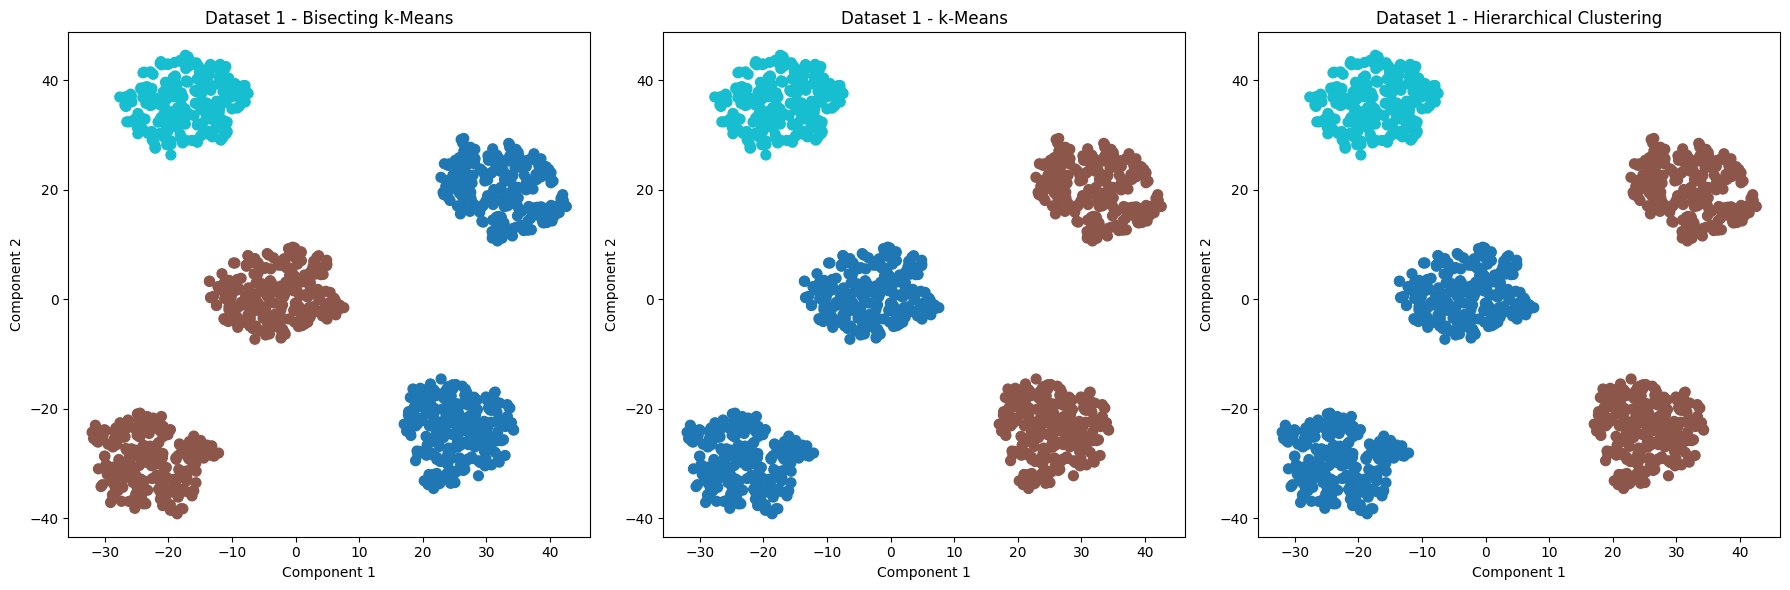

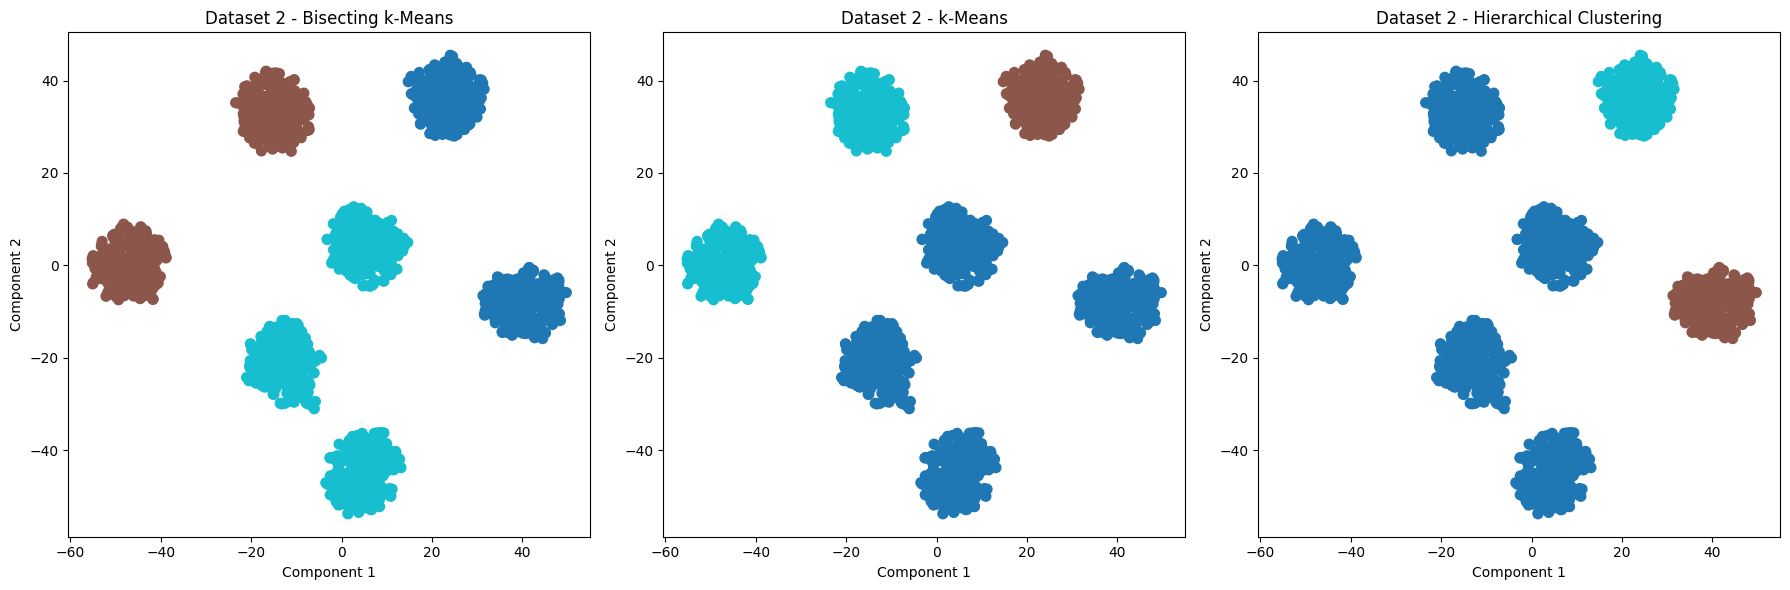

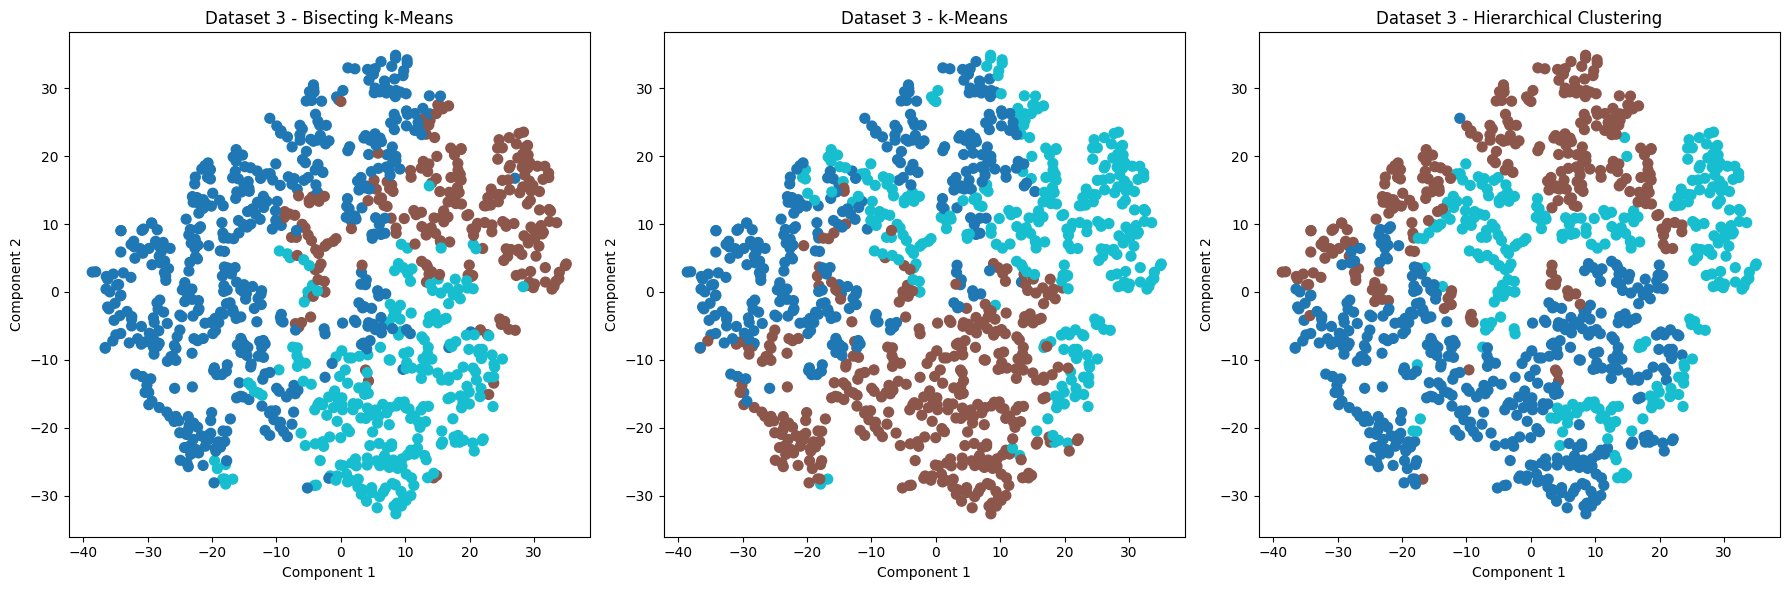

In [63]:
from sklearn.cluster import KMeans, AgglomerativeClustering

# Load the synthetic datasets
dataset_1 = pd.read_csv('datasets/synthetic_dataset_1.csv')
dataset_2 = pd.read_csv('datasets/synthetic_dataset_2.csv')
dataset_3 = pd.read_csv('datasets/synthetic_dataset.csv')

# Extract features and labels
X_1 = dataset_1.iloc[:, :-1].values
y_1 = dataset_1['label'].values
X_2 = dataset_2.iloc[:, :-1].values
y_2 = dataset_2['label'].values
X_3 = dataset_3.iloc[:, :-1].values
y_3 = dataset_3['label'].values

# Function to apply clustering techniques and plot
def plot_clustering_techniques(X, title_prefix):
    clusters_bkmeans = bkmeans(X, k, iter)
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
    clusters_kmeans = kmeans.labels_
    hierarchical = AgglomerativeClustering(n_clusters=k).fit(X)
    clusters_hierarchical = hierarchical.labels_
    tsne = TSNE(n_components=2, random_state=42)
    X_tsne = tsne.fit_transform(X)

    fig, axs = plt.subplots(1, 3, figsize=(18, 6))
    
    # Plot Bisecting k-Means
    axs[0].scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters_bkmeans, cmap='tab10', s=50)
    axs[0].set_title(f"{title_prefix} - Bisecting k-Means")
    axs[0].set_xlabel("Component 1")
    axs[0].set_ylabel("Component 2")
    
    # Plot classic k-Means
    axs[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters_kmeans, cmap='tab10', s=50)
    axs[1].set_title(f"{title_prefix} - k-Means")
    axs[1].set_xlabel("Component 1")
    axs[1].set_ylabel("Component 2")
    
    # Plot hierarchical clustering
    axs[2].scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters_hierarchical, cmap='tab10', s=50)
    axs[2].set_title(f"{title_prefix} - Hierarchical Clustering")
    axs[2].set_xlabel("Component 1")
    axs[2].set_ylabel("Component 2")
    
    plt.tight_layout()
    plt.show()

# Plot for dataset 1
plot_clustering_techniques(X_1, "Dataset 1")

# Plot for dataset 2
plot_clustering_techniques(X_2, "Dataset 2")

# Plot for dataset 3
plot_clustering_techniques(X_3, "Dataset 3")